In [2]:
# Importing all necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
retail = pd.read_csv('../Data/online_retail.csv')

In [4]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# Data Cleaning

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Figuring out number of missing values in each column

In [6]:
retail.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

#### The total number of rows :

In [7]:
retail.shape[0]

541909

** Hence, we find out that out of total 5 lakh rows, more than 1 lakh rows have no customerID specified and as many as 1454 rows have no product description mentioned. **

In [8]:
# Number of those rows with Description null

retail[retail.Description.isnull() & retail.CustomerID.isnull()].shape[0]

1454

** This indicates that orders with no description mentioned have no customerID specified. 
    Hence all of those rows can be deleted. **

## Removing the rows with missing values

In [9]:
retail_new = retail.dropna()

In [10]:
retail_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [11]:
# checking for missing values

retail_new.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [12]:
# changing the InvoiceDate format from string to Timestamp format

retail_new.InvoiceDate = pd.to_datetime(retail_new.InvoiceDate, format='%m/%d/%Y %H:%M')

/home/heenal/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [13]:
# Total number of orders :
retail_new.InvoiceNo.nunique()

22190

In [14]:
# number of unique products being ordered
retail_new.Description.nunique()

3896

In [15]:
# total number of customers
retail_new.CustomerID.nunique()

4372

In [16]:
# rows with negative quantity value
retail_new[retail_new.Quantity < 0 ].shape[0]

8905

** There are 8905 rows with negative quantity ordered. **

## Removing the rows with negative quantity of product ordered

In [17]:
retail_new = retail_new[retail_new.Quantity >= 0]

In [18]:
retail_new[retail_new.Quantity <0].shape[0]

0

** All rows with negative quantity removed **

# Adding a column for the total price of the product ordered

In [19]:
retail_new['TotalPrice'] = retail_new.Quantity * retail_new.UnitPrice

/home/heenal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
retail_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


# Number of orders of different customers

In [21]:
orders = retail_new.groupby(by=['CustomerID', 'Country'], as_index=False).InvoiceNo.count()
orders

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17
5,12352.0,Norway,85
6,12353.0,Bahrain,4
7,12354.0,Spain,58
8,12355.0,Bahrain,13
9,12356.0,Portugal,59


In [26]:
sorted_orders = orders.sort_values(by='InvoiceNo', ascending=False)
sorted_orders.head(n=20)

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700
2185,15311.0,United Kingdom,2379
1698,14646.0,Netherlands,2080
570,13089.0,United Kingdom,1818
699,13263.0,United Kingdom,1677
1443,14298.0,United Kingdom,1637


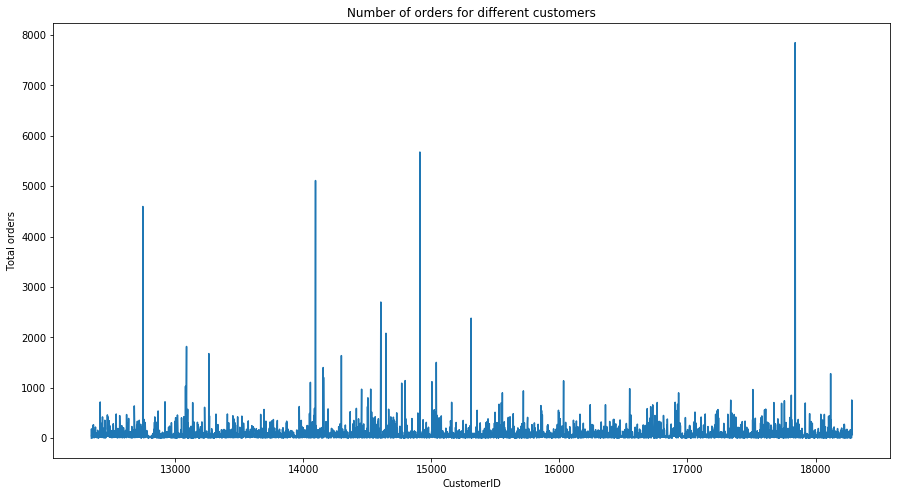

In [27]:
plt.subplots(figsize=(15,8))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('CustomerID')
plt.ylabel('Total orders')
plt.title('Number of orders for different customers')
plt.show()

In [28]:
orders[orders.InvoiceNo == orders.InvoiceNo.max()]

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847


### Observation :
    The customer that has placed the maximum orders is from UK.

# Number of customers from different countries

In [29]:
df = retail_new.groupby(['Country']).CustomerID.value_counts().unstack()
df.notnull().sum(axis=1)

Country
Australia                  9
Austria                   11
Bahrain                    2
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       3
European Community         1
Finland                   12
France                    87
Germany                   94
Greece                     4
Iceland                    1
Israel                     3
Italy                     14
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  19
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     30
Sweden                     8
Switzerland               21
USA                        4
United

### Analysing the top 20 customer countries

In [49]:
top20 = df.notnull().sum(axis=1)
top20 = top20.sort_values(ascending=False)
top20 = top20.head(n=20)
top20

Country
United Kingdom     3921
Germany              94
France               87
Spain                30
Belgium              25
Switzerland          21
Portugal             19
Italy                14
Finland              12
Austria              11
Norway               10
Channel Islands       9
Denmark               9
Australia             9
Netherlands           9
Cyprus                8
Japan                 8
Sweden                8
Poland                6
Unspecified           4
dtype: int64

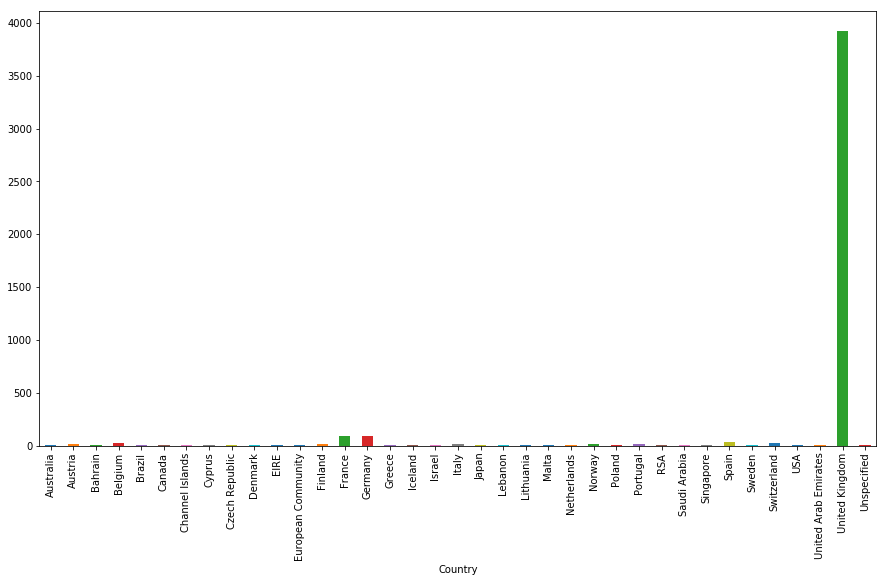

In [30]:
# All the customers
df.notnull().sum(axis=1).plot(kind='bar', figsize=(15,8))

### Observation : 
Maximum number(around 3921) of customers belong to UK.

In [31]:
retail_new.groupby(by=['CustomerID', 'Country']).TotalPrice.sum()

CustomerID  Country       
12346.0     United Kingdom    77183.60
12347.0     Iceland            4310.00
12348.0     Finland            1797.24
12349.0     Italy              1757.55
12350.0     Norway              334.40
12352.0     Norway             2506.04
12353.0     Bahrain              89.00
12354.0     Spain              1079.40
12355.0     Bahrain             459.40
12356.0     Portugal           2811.43
12357.0     Switzerland        6207.67
12358.0     Austria            1168.06
12359.0     Cyprus             6372.58
12360.0     Austria            2662.06
12361.0     Belgium             189.90
12362.0     Belgium            5226.23
12363.0     Unspecified         552.00
12364.0     Belgium            1313.10
12365.0     Cyprus              641.38
12367.0     Denmark             168.90
12370.0     Austria             277.20
            Cyprus             3268.49
12371.0     Switzerland        1887.96
12372.0     Denmark            1298.04
12373.0     Austria             364.6

# Monthly revenue

In [32]:
retail_new['Month'] = retail_new.InvoiceDate.dt.month

/home/heenal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
retail_new.InvoiceDate

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
5        2010-12-01 08:26:00
6        2010-12-01 08:26:00
7        2010-12-01 08:28:00
8        2010-12-01 08:28:00
9        2010-12-01 08:34:00
10       2010-12-01 08:34:00
11       2010-12-01 08:34:00
12       2010-12-01 08:34:00
13       2010-12-01 08:34:00
14       2010-12-01 08:34:00
15       2010-12-01 08:34:00
16       2010-12-01 08:34:00
17       2010-12-01 08:34:00
18       2010-12-01 08:34:00
19       2010-12-01 08:34:00
20       2010-12-01 08:34:00
21       2010-12-01 08:34:00
22       2010-12-01 08:34:00
23       2010-12-01 08:34:00
24       2010-12-01 08:34:00
25       2010-12-01 08:35:00
26       2010-12-01 08:45:00
27       2010-12-01 08:45:00
28       2010-12-01 08:45:00
29       2010-12-01 08:45:00
                 ...        
541879   2011-12-09 12:31:00
541880   2011-12-09 12:31:00
541881   2011-12-09 12:31:00
541882   2011-

In [34]:
retail_new.groupby(['Month']).TotalPrice.sum()

Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: TotalPrice, dtype: float64

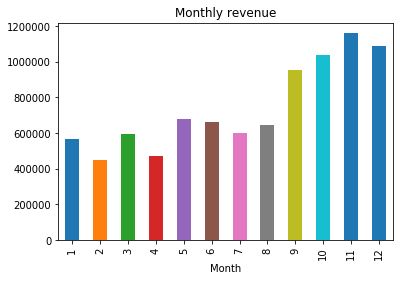

In [35]:
plt.title('Monthly revenue')
retail_new.groupby(['Month']).TotalPrice.sum().plot(kind='bar')

### Observation: 
    November observes the maximum income for the company.

# Monthly sales

In [36]:
retail_new.Month.value_counts().sort_index()

# is same as :
# retail_new.groupby(['Month']).InvoiceNo.count()

1     21232
2     19928
3     27177
4     22644
5     28322
6     27185
7     26827
8     27013
9     40030
10    49557
11    64545
12    43464
Name: Month, dtype: int64

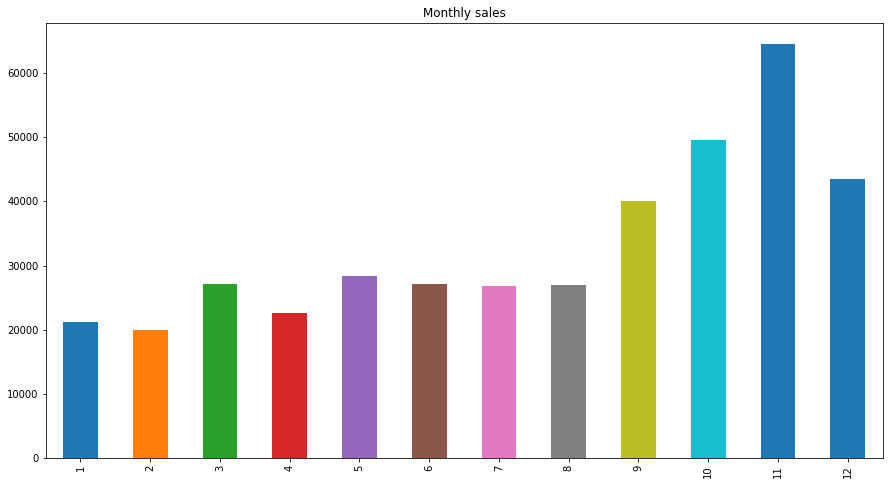

In [37]:
plt.title('Monthly sales')
retail_new.Month.value_counts().sort_index().plot(kind='bar', figsize=(15,8))

### Observation :
    The month of November observes the maximum sales.

# Analysis of discounted products

In [38]:
discounts = retail_new[retail_new.TotalPrice == 0]

In [39]:
discounts

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0,12
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0,12
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0,12
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0,1
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0,1
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0.0,1
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0.0,2
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0.0,3
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0.0,3
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0.0,4


In [40]:
discounts.Month.value_counts().sort_index()

1      3
2      1
3      2
4      2
5      2
7      2
8      6
9      2
10     3
11    14
12     3
Name: Month, dtype: int64

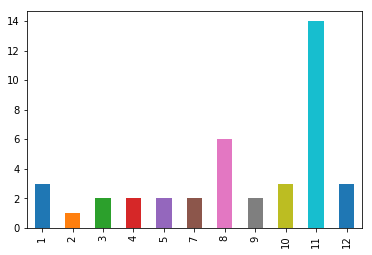

In [41]:
discounts.Month.value_counts().sort_index().plot(kind='bar')

### Observation :
    1. The firm gives away maximum products for free in the month of November.
    2. Products are given for free throughout the year except for the month of June.